# Please Note
## In an event where this notebook encounters errors during run time please click [here](https://github.com/mqnifestkelvin/MDF/blob/main/Outreachy_application/Keras_to_mdf_using_Iris_data_set/Incase_of_troubles_running_mdf_to_kera.ipynb) to try out this notebook

# Table of contents
 * [Project description](#Project-description)
 * [About data](#About-data)
 * [The columns in the data set](#The-columns-in-the-data-set)
 * [Libraries used in this demonstration](#Libraries-used-in-this-demonstration)
 * [Standard workflow imports](#Standard-workflow-imports)
 * [Loading our dataset using from sklearn](#Loading-our-dataset-using-from-sklearn)
 * [Splitting our data into train and test set](#Splitting-our-data-into-train-and-test-set)
 * [Loading our previously trained keras model into our keras-mdf-demonstration](#Loading-our-trained-keras-model-into-our-keras-mdf-demonstration)
 * [Iterating through our parameters such as model weights and model biases](#Iterating-our-parameters-such-as-model-weights-and-model-biases)
 * [Instanciating our model and graph object and input layer creation](#Instanciating-our-model-and-graph-object-and-input-layer-creation)
 * [Creation of our first layer setting our input port parameter values such as respective layer equations and setting our output ports](#Creation-of-our-first-layer-setting-our-input-port-parameter-values-such-as-respective-layer-equations-and-setting-our-output-ports)
 * [Setting activation one critaria based on similar critaria as used when training the keras model in the previous demonstration](#Setting-activation-one-critaria-based-on-similar-critaria-as-used-when-training-the-keras-model-in-the-previous-demonstration)
 * [Creation of our second layer setting our input port parameter values such as respective layer equations and setting our output ports](#Creation-of-our-second-layer-setting-our-input-port-parameter-values-such-respective-layer-equations-and-setting-our-output-ports)
 * [Setting activation two critaria based on similar critaria as used when training the keras model in the previous demonstration](#Setting-activation-two-critaria-based-on-similar-critaria-as-used-when-training-the-keras-model-in-the-previous-demonstration)
 * [Creation of our third layer setting our input port parameter values such as respective layer equations and setting our output ports](#Creation-of-our-third-layer-setting-our-input-port-parameter-values-such-as-respective-layer-equations-and-setting-our-output-ports)
 * [Setting activation three critaria based on similar critaria as used when training the keras model in the previous demonstration](#Setting-activation-three-critaria-based-on-similar-critaria-as-used-when-training-the-keras-model-in-the-previous-demonstration)
 * [Creation of our fourth layer setting our input port parameter values such as respective layer equations and setting our output ports](#Creation-of-our-fourth-layer-setting-our-input-port-parameter-values-such-as-respective-layer-equations-and-setting-our-output-ports)
 * [Setting activation four critaria based on similar critaria as used when training the keras model in the previous demonstration](#Setting-activation-four-critaria-based-on-similar-critaria-as-used-when-training-the-keras-model-in-the-previous-demonstration)
 * [Intializing the graph evaluation and evaluating the graph parameters](#Intializing-the-graph-evaluation-and-evaluating-the-graph-parameters)
 * [Evaluating respective parameter the activations and their conditions various parameter evaluation equations passed into the various nodes](#Evaluating-respective-parameter-the-activations-and-their-conditions-various-parameter-evaluation-equations-passed-into-the-various-nodes)
 * [Making predictions of our x_test using the converted keras model and making comparision with our actual values and that of the keras model](#predictions-of-our-x_test-using-the-converted-keras-model-and-making-comparision-with-our-actual-values-and-that-of-the-keras-model)
 * [Graph visualization and image generation](#Graph-visualization-and-image-generation)
 * [Saving our mdf model structure](#Saving-our-mdf-model-structure)

## Project description
In the previous notebook we discussed how to create a keras model. I know we'd all be wondering why are we even doing this anyways, we be asking of what importance is the model we created is to this project, well lets take a deep dive into our project decription and find out why.
In this project, we will be making use of the ModeCEI/MDF library, to simplify things to the simplest of forms, we will be using the ModeCEI/MDF libraries and its various tools as a plugin into the model we created. The various tools withing this library will serve as connection points extablishing a communication link between the model and the use of this model in other platforms such as ModeCEI/MDF and others. SImilar to how we can easily input our data into the our model by first uploading our model into our work station by doing `from tensorflow.keras.model import load_model` followed by running the `.predict(x_test)` on the model. The purpose of these demonstration is to achieve the same outcome by accessing all the mathematical architecture of the model parameters such as its weights and its biases. Accessing of these parameters are then evaluated with the help of the various activation parameters and with the use of node functions. This may seem tidious at first but inplementing this in function form in subsequent times would make it a whole more worthwhile. But for now this demonstration is done specifically for the sole purpose of testing our understanding of the ModeCEI MDF library. 
## About data
Like said in the previous demonstration, this data is a slight modification of the popular dataset known as the Iris data set. Originally, the dataset comprised of three species being the Iris-setosa, Iris-versicolor and iris-virginica. Although these data were slightly modeified by the removal of the third species for the sake of this demonstration. Also for the sake of this demonstration, we made use of 0s and 1s to depict theIris-setosa and Iris versicolor respectively.
## The columns in the data set
 * ID: These are the various index number assigned to each roles. This starts from index zero (0) and terminates at ninty nine (99)
 * Sepal Length in Cm: This is the length of the sepals, which are the green leaf like structures that surrounds and protects the flower when it is in bud.
 * Sepal Width in Cm: This is the width of the sepal whic is measured in perpendicular length.
 * Petal Length Cm: This refers to the length of the petals, which are colorful leaflike structures that make up the outer most parts of of the flower.
 * Petal WIdth Cm: This is the width of the petal and it is also measured in perpendicular length.
 * Species: The species are our target variables for the model, and are Iris-setosa and Iris-vesicolor. They are assigned numerical values of 0 and 1 respectively
## Libraries used in this demonstration
 * **Numpy**: Numpy is a Python library used for numerical computing. This library provides fast and efficient functions for performing mathematical operations for performing mathematical operations on array and matrices. Numpy's main datatype is the ndarray, which is a multidimentional array that allows us perfrm mathematical operations on entire arrays
 * **modeci_mdf.execution_engine.EvaluablesGraph**: The `EvaluableGraph` library evaluates a  graph by making use of the execution engine. The evaluated graph consist of a node(s) linked together through edges. This library is imported from the modeci_mdf.execution_engine. One of the function from the Evaluable graph used in this demonstration includes:
   * `evalate`:- This function is used to evalaute a full fledge graph having nodes and edges. It functions by evaluating the functions passed as parameter values. If input values exist, it factors then in and evaluates them to generate a final output values for each node.
 * **modeci_mdf.mdf**: This library enables moodel, graph, node(s) instanciation. It also enables setting of parameter identity and values. With the use of build in functions from it's libraries, imput and output nodes can be set to the nodes instanciated. This is by far one of the most important libraries as without it, the creation of graph, model and node(s) object will not be possible. In this demonstration, functions used include:

   * `Model`:- This instanciates a model which contains graph(s) objects and attribute parameters.

   * `Graph`:- This acts as a container for the node(s) created, its parameters, their edges, and condtions. Without the graph, the simple_connect function cannot perform as it takes the generated graph as an arguement. It aid the linking of node through their edges which is made possible through the interconnectedness of output(s) and input port(s).

   * `Node`:- The node is also a very important function. The node function is responsible for the creation of node objects. It serves as a store and at the same time as a link to another data point or node instance where it transfers data to. The node recieves parameters and parameter values through input and output port(s). This aids transfer of data from one node to the other.
 * **modeci_mdf.utils.simple_connect**: This is an extremely useful library, it contains useful utility function capable of handling various MDF objects. One of the function belonging to this library used in this demonstration includes:

   * `simple_connect`:- This is Used for creating an edge that connnects two input and output port of to or more nodes together and into a graph.
 * **Pandas**: In this demonstration, it was used to enable us reconstruct our final Y_Pred againts the actual_Y values in a dataframe.
 * **Sklearn.model_selection.train_test_split**: In this demonstration, this function was gotten form the scikit-learn library, this function enables us to split our data sets into a training set and a test set. This is an essential step in machine learning as it helps us evaluate the performance of a model on data it has never seen before.
 * **Tensorflow.keras.models.save_model**: This is also a function from thekeras library in Python, This allows us to save a trained model to a file for later usage. this function can be used to save the keras model along with its architecture, weights and optimizer state. It use a .h5 extension when making saves.

## Standard workflow imports

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from modeci_mdf.execution_engine import EvaluableGraph
from modeci_mdf.utils import simple_connect
from modeci_mdf.mdf import *
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

## Loading our dataset using from sklearn
The data was imported into jupyter as a numpy array, this is done using the `load_iris()` function, this imports the dataset to be from the sklearn datasets into our jupyter notebook. Because we are only working with the first two target we sliced the X and y values to a range of 100 each, this is a range where both the critarias of X and y range are perfectly satisfied.

In [2]:
my_dataset = load_iris()
X = my_dataset.data
y = my_dataset.target
X = X[:100]
y = y[:100]

## Splitting our data into train and test set
This is a big requirement when it comes to model training, it doesnt just stop at simple splitting the data, it goes beyond that it randomises the data in such as way as to enable non ordered destribution especially for this type of data where all the rows are arranged from 0s to 1s and being the species Iris-setosa and Iris-vesicolor respectively. In this case there is a need for randomisation. Note because random states constantly changes we need to set a random state or randomisation seed value so as to lock our randomisation to a set fixed randomisation pattern.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)
X_train.shape, y_train.shape

((80, 4), (80,))

## Loading our previously trained keras model into our keras-mdf-demonstration
Our model was created trained, evaluated and finally saved in our previous model creation with keras. In this demonstration, we will be making use of the keras model inorder to make a side by side comparison between the Actual_Y_Pred, Keras_Y_Pred and our MDF_Y_Pred.

In [4]:
model = load_model('model.h5')

## Iterating through our parameters such as model weights and model biases
This simple loop iterates through every single prarmeter parameter values such such weights and biases of the keras model. This iteration is repeated for each and every layer until all the layers bias and weight have been completely iterated through.

In [5]:
parameters= {}
activation=[]
layers_of_model= ['first_layer', 'second_layer', 'third_layer', 'fourth_layer']
for item in layers_of_model:
    dic= {}
    layer= model.get_layer(item)
    weight,bias = layer.weights
    dic['weights']= np.array(weight)
    dic['bias']= np.array(bias)
    parameters[item]= dic
    activation.append(str(layer.activation).split()[1])

## Instanciating our model and graph object and input layer creation
Our model is created through the instantiation of our model object, usually assigned an ID. After instantiating the model, the graph is created by instanciating a graph object and appending this object into the model that is generated. After this is done, the first layer which is the input layer is created and also assigned an ID. When the node created, it is provided an output port from which it can transfer valuable information to the next node or in this case layer.

In [6]:
# Generating a model container
model_mdf= Model(id= 'Iris Data Prediction')

# Model  with graph
graph= Graph(id= 'Predictions using converted Keras model using mdf')

# linking the model to graph
model_mdf.graphs.append(graph)

# Instanciating our input layer
input_layer = Node(id= 'input layer', metadata= {'color': '.0 .6 .8'})

# Adding parameter value(s) to node one instance.
input_layer.parameters.append(Parameter(id= 'input_layer', value= X_test))

# Adding output port to our input layer 
input_layer.output_ports.append(OutputPort(id= 'output', value= 'input_layer'))

# Adding our input to instanciated graph
graph.nodes.append(input_layer)

## Creation of our first layer, setting our input port, parameter values such as respective layer equations and setting our output ports
Creation of our first layer is done by creating a node instances and assigning suitable node identity and respective color profile of the node. After this is done, an input node is added so as to enable the node obtain valuable information from successive node in order the continue the successive flow of information form one node to the other. After an input port has been supplied, parameter values such as model weights and biases are then added to our node as values to be taken as input values for the next port. As soon as the respective parameters have been added, the layer evaluation function is created and added to the layer node. When this is completed, the output port is generated and added to the node and a respective value and identity assigned to it. Finally the first node is assigned to the graph container which houses the nodoes. A soon as we have achieved this, we link the `input layer` with the `first node` or `first layer` together with the aid of the `simple_connect` function together with the instanciated graph.

In [7]:
# Instanciating our first layer
first_node = Node(id='first_layer_layer', metadata= {'color':'.0 .8 .8'})

# Adding first node input port
first_node.input_ports.append(InputPort(id= 'input_layer'))

# Adding parameter value(s) (weights) to first node instance
first_node.parameters.append(Parameter(id='first_layer_weight',
                                       value= parameters['first_layer']['weights']))

# Adding parameter value(s) (bias) to first node instance
first_node.parameters.append(Parameter(id='first_layer_bias',
                                       value= parameters['first_layer']['bias']))

# Evaluation function to node
first_layer_equation = Parameter(id= 'first_layer_equation',
                       value= '(input_layer @ first_layer_weight) + first_layer_bias')

# Adding evalation function into first node instance
first_node.parameters.append(first_layer_equation)

# Adding output port to the first node
first_node.output_ports.append(OutputPort(id= 'first_layer_output', value= 'first_layer_equation'))

# Adding first node to instanciated graph
graph.nodes.append(first_node)

# Connecting input layer to first node
simple_connect(input_layer, first_node, graph)

Edge(metadata=None, id='edge_input layer_first_layer_layer', sender='input layer', receiver='first_layer_layer', sender_port='output', receiver_port='input_layer', parameters=None)

## Setting activation one critaria based on similar critaria as used when training the keras model in the previous demonstration
This involves the creation of a layer that mimics the activation critaria similar to the one used in the creation of our keras model. The activation in this layer is based on the relu function which is mimiced here in this demonstration. In this layer, input and output ports are created to fascilitate the flow of data from successive layers into the next and out. Apart form doing this, parameter values are also equally created as well as a relu condition being assigned to the activation layer. Similar to the nodes, the activation is added to the node and the `first node` and `activation one` are connected using the `simple_connect` function.

In [8]:
# create first layer activation node
activation_1= Node(id= 'first_layer_activation', metadata= {'color': '.0 .1 .6'})

# Adding the input port to activation one 
activation_1.input_ports.append(InputPort(id='first_layer_output'))

# Establishing parameter value for the relu evaluation function
activation= Parameter(id= 'relu',
                  value = 'first_layer_output * first_layer_output')

# Adding conditional critaria to the propagation of the relu fuction created up above
activation.conditions.append(ParameterCondition(id= 'relu_test',
                        test= 'relu > 0', value = 'relu'))

# Adding the created evalations equation and critaria into the activation layer
activation_1.parameters.append(activation)

# Adding an output port to aid the movement of data from the activation layer into another layer
activation_1.output_ports.append(OutputPort(id='activation_1', value= 'relu'))

# Adding activation one into instanciated graph
graph.nodes.append(activation_1)

# Connecting first node to activation one
simple_connect(first_node, activation_1, graph)

Edge(metadata=None, id='edge_first_layer_layer_first_layer_activation', sender='first_layer_layer', receiver='first_layer_activation', sender_port='first_layer_output', receiver_port='first_layer_output', parameters=None)

## Creation of our second layer, setting our input port, parameter values such as respective layer equations and setting our output ports

In [9]:
# Instanciating our second layer
second_node= Node(id='second_layer_layer', metadata= {'color':'.8 .4 .8'})

# Adding second node input port
second_node.input_ports.append(InputPort(id= 'activation_1'))

# Adding parameter value(s) (weights) to second node instance
second_node.parameters.append(Parameter(id='second_layer_weight',
                                        value= parameters['second_layer']['weights']))

# Adding parameter value(s) (bias) to second node instance
second_node.parameters.append(Parameter(id='second_layer_bias',
                                        value= parameters['second_layer']['bias']))

# Evaluation function to node
second_layer_equation= Parameter(id= 'second_layer_equation',
                       value= '(activation_1 @ second_layer_weight)\
                       + second_layer_bias')

# Adding evalation function into second node instance
second_node.parameters.append(second_layer_equation)

# Adding output port to the second node
second_node.output_ports.append(OutputPort(id= 'second_layer_output',
                                           value= 'second_layer_equation'))

# Adding second node to instanciated graph
graph.nodes.append(second_node)

# Connecting activation one to second node
simple_connect(activation_1, second_node, graph)

Edge(metadata=None, id='edge_first_layer_activation_second_layer_layer', sender='first_layer_activation', receiver='second_layer_layer', sender_port='activation_1', receiver_port='activation_1', parameters=None)

## Setting activation two critaria based on similar critaria as used when training the keras model in the previous demonstration

In [10]:
# create second layer activation node
activation_2= Node(id= 'second_layer_activation', metadata= {'color':'.8 .4 .0'})

# Adding the input port to activation two
activation_2.input_ports.append(InputPort(id='second_layer_output'))

# Establishing parameter value for the relu evaluation function
activation = Parameter(id= 'relu',
                  value = 'second_layer_output * second_layer_output')

# Adding conditional critaria to the propagation of the relu fuction created up above
activation.conditions.append(ParameterCondition(id= 'relu_test',
                        test= 'relu > 0', value = 'relu'))

# Adding the created evalations equation and critaria into the activation layer
activation_2.parameters.append(activation)

# Adding an output port to aid the movement of data from the activation layer into another layer
activation_2.output_ports.append(OutputPort(id='activation_2', value= 'relu' ))

# Adding activation three into instanciated graph
graph.nodes.append(activation_2)

# Connecting activation one to second node
simple_connect(second_node,activation_2, graph)

Edge(metadata=None, id='edge_second_layer_layer_second_layer_activation', sender='second_layer_layer', receiver='second_layer_activation', sender_port='second_layer_output', receiver_port='second_layer_output', parameters=None)

## Creation of our third layer, setting our input port, parameter values such as respective layer equations and setting our output ports

In [11]:
# Instanciating our third layer
third_node= Node(id='third_layer_layer', metadata= {'color':'.4 .3 .8'})

# Adding third node input port
third_node.input_ports.append(InputPort(id= 'activation_2'))

# Adding parameter value(s) (weights) to second node instance
third_node.parameters.append(Parameter(id='third_layer_weight',
                                       value= parameters['third_layer']['weights']))

# Adding parameter value(s) (bias) to second node instance
third_node.parameters.append(Parameter(id='third_layer_bias',
                                       value= parameters['third_layer']['bias']))

# Evaluation function to node
third_layer_equation= Parameter(id= 'third_layer_equation',
                       value= '(activation_2 @ third_layer_weight)\
                       + third_layer_bias')

# Adding evalation function into second node instance
third_node.parameters.append(third_layer_equation)

# Adding output port to the third node
third_node.output_ports.append(OutputPort(id= 'third_layer_output',
                                          value= 'third_layer_equation'))

# Adding third node to instanciated graph
graph.nodes.append(third_node)

# Connecting activation two to third node
simple_connect(activation_2, third_node, graph)

Edge(metadata=None, id='edge_second_layer_activation_third_layer_layer', sender='second_layer_activation', receiver='third_layer_layer', sender_port='activation_2', receiver_port='activation_2', parameters=None)

## Setting activation three critaria based on similar critaria as used when training the keras model in the previous demonstration

In [12]:
# create third layer activation node
activation_3 = Node(id= 'third_layer_activation', metadata= {'color': '.0 .1 .8'})

# Adding the input port to activation three
activation_3.input_ports.append(InputPort(id='third_layer_output'))

# Establishing parameter value for the relu evaluation function
activation = Parameter(id= 'relu',
                  value = 'third_layer_output * third_layer_output')

# Adding conditional critaria to the propagation of the relu fuction created up above
activation.conditions.append(ParameterCondition(id= 'relu_test',
                        test= 'relu > 0', value = 'relu'))

# Adding the created evalations equation and critaria into the activation layer
activation_3.parameters.append(activation)

# Adding an output port to aid the movement of data from the activation layer into another layer
activation_3.output_ports.append(OutputPort(id='activation_3', value= 'relu'))

# Adding activation three into instanciated graph
graph.nodes.append(activation_3)

# Connecting third node to activation three
simple_connect(third_node,activation_3, graph)

Edge(metadata=None, id='edge_third_layer_layer_third_layer_activation', sender='third_layer_layer', receiver='third_layer_activation', sender_port='third_layer_output', receiver_port='third_layer_output', parameters=None)

## Creation of our fourth layer, setting our input port, parameter values such as respective layer equations and setting our output ports

In [13]:
# Instanciating our fourth layer
fourth_node= Node(id='fourth_layer_layer', metadata= {'color':'.7 .9 .8'})

# Adding fourth node input port
fourth_node.input_ports.append(InputPort(id= 'activation_3'))

# Adding parameter value(s) (weights) to second node instance
fourth_node.parameters.append(Parameter(id='fourth_layer_weight',
                                        value= parameters['fourth_layer']['weights']))

# Adding parameter value(s) (bias) to second node instance
fourth_node.parameters.append(Parameter(id='fourth_layer_bias',
                                        value= parameters['fourth_layer']['bias']))

# Evaluation function to node
fourth_layer_equation= Parameter(id= 'fourth_layer_equation',
                       value= '(activation_3 @ fourth_layer_weight)\
                       + fourth_layer_bias')

# Adding evalation function into second node instance
fourth_node.parameters.append(fourth_layer_equation)

# Adding output port to the fourth node
fourth_node.output_ports.append(OutputPort(id= 'fourth_layer_output',
                                           value= 'fourth_layer_equation'))
# Adding third node to instanciated graph
graph.nodes.append(fourth_node)

# Connecting activation three to fourth node
simple_connect(activation_3, fourth_node, graph)

Edge(metadata=None, id='edge_third_layer_activation_fourth_layer_layer', sender='third_layer_activation', receiver='fourth_layer_layer', sender_port='activation_3', receiver_port='activation_3', parameters=None)

## Setting activation four critaria based on similar critaria as used when training the keras model in the previous demonstration

In [14]:
# create fourth layer activation node
activation_4= Node(id= 'fourth_layer_activation', metadata= {'color': '.0 .3 .8'})

# Adding the input port to activation four
activation_4.input_ports.append(InputPort(id='fourth_layer_output'))

# Establishing parameter value for the sigmoid evaluation function
activation= Parameter(id= 'sigmoid', 
                     value= '1/(1 + (2.71828 ** (-fourth_layer_output)))')

# Adding the sigmoid fuction created up above into the activation parameter
activation_4.parameters.append(activation)

# Adding an output port to aid the movement of data from the activation layer into another layer
activation_4.output_ports.append(OutputPort(id='activation_4', value= 'sigmoid' ))

# Adding activation four into instanciated graph
graph.nodes.append(activation_4)

# Connecting third node to activation four
simple_connect(fourth_node, activation_4, graph)

Edge(metadata=None, id='edge_fourth_layer_layer_fourth_layer_activation', sender='fourth_layer_layer', receiver='fourth_layer_activation', sender_port='fourth_layer_output', receiver_port='fourth_layer_output', parameters=None)

## Intializing the graph evaluation and evaluating the graph parameters
The gerated graph is passed into the function `EvaluableGraph`, The graph passed into the `EvaluableGraph` is evaluated using the `evaluate()` function. This performs all the behind the scenes calculations and computation, enabling the model generate the desired outputs and outcomes.

In [15]:
evaluated_graph = EvaluableGraph(graph, verbose=False)


Init graph: Predictions using converted Keras model using mdf


## Evaluating respective parameter, the activations and their conditions, various parameter evaluation equations passed into the various nodes 

In [16]:
evaluated_graph.evaluate()

Evaluating graph: Predictions using converted Keras model using mdf, root nodes: ['input layer'], with array format numpy


## Making predictions of our x_test using the converted keras model and making comparision with our actual values and that of the keras model 
The purpose of this demonstration is to evaluate our understanding of the MDF libraries and its mission, with respect to this, I was able to use the MDF in connectong into the neurons of the pretrained keras model. Using the information/data extracted from the model and feeding it into the input port of the MDF model, the model was observed to have outputed similar results as the prediction made from the pretrained keras model, this was an exact mirroring of the keras model's abilities.

In [17]:
my_df = pd.DataFrame(y_test)
my_df.columns = ["Actual_Y_test"]
my_df["Keras_Y_Pred"] = model.predict(X_test).round().astype(int)
my_df["MDF_Y_Pred"] = evaluated_graph.enodes["fourth_layer_activation"].evaluable_outputs["activation_4"].curr_value.round().astype(int)
my_df

1/1 [==============================] - 1s 684ms/step


,Actual_Y_test,Keras_Y_Pred,MDF_Y_Pred
0,1,1,1
1,1,1,1
2,1,1,1
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,1
8,0,0,0
9,0,0,0


## Saving our mdf model structure

In [18]:
model_mdf.to_json_file("keras_to_mdf.json")
model_mdf.to_yaml_file("keras_to_mdf.yaml")

'keras_to_mdf.yaml'

## Graph visualization and image generation
No data analysis library would be complete without appropriate visualization engine. The is necessary because it enables users of the graphs and model output to draw insigns and know what exactly is happening at a single glance of the visualization or image generated. To generate a visualization it is necessary to set the generation parameter using the `to_graph_image`. Using this, we can easily set the engine, the output_format, files save location and orientation of the image.

Converting MDF graph: Predictions using converted Keras model using mdf to graphviz (level: 4, format: png)
    Node: input layer
    Node: first_layer_layer
    Node: first_layer_activation
    Node: second_layer_layer
    Node: second_layer_activation
    Node: third_layer_layer
    Node: third_layer_activation
    Node: fourth_layer_layer
    Node: fourth_layer_activation
    Edge: edge_input layer_first_layer_layer connects input layer to first_layer_layer
    Edge: edge_first_layer_layer_first_layer_activation connects first_layer_layer to first_layer_activation
    Edge: edge_first_layer_activation_second_layer_layer connects first_layer_activation to second_layer_layer
    Edge: edge_second_layer_layer_second_layer_activation connects second_layer_layer to second_layer_activation
    Edge: edge_second_layer_activation_third_layer_layer connects second_layer_activation to third_layer_layer
    Edge: edge_third_layer_layer_third_layer_activation connects third_layer_layer to third

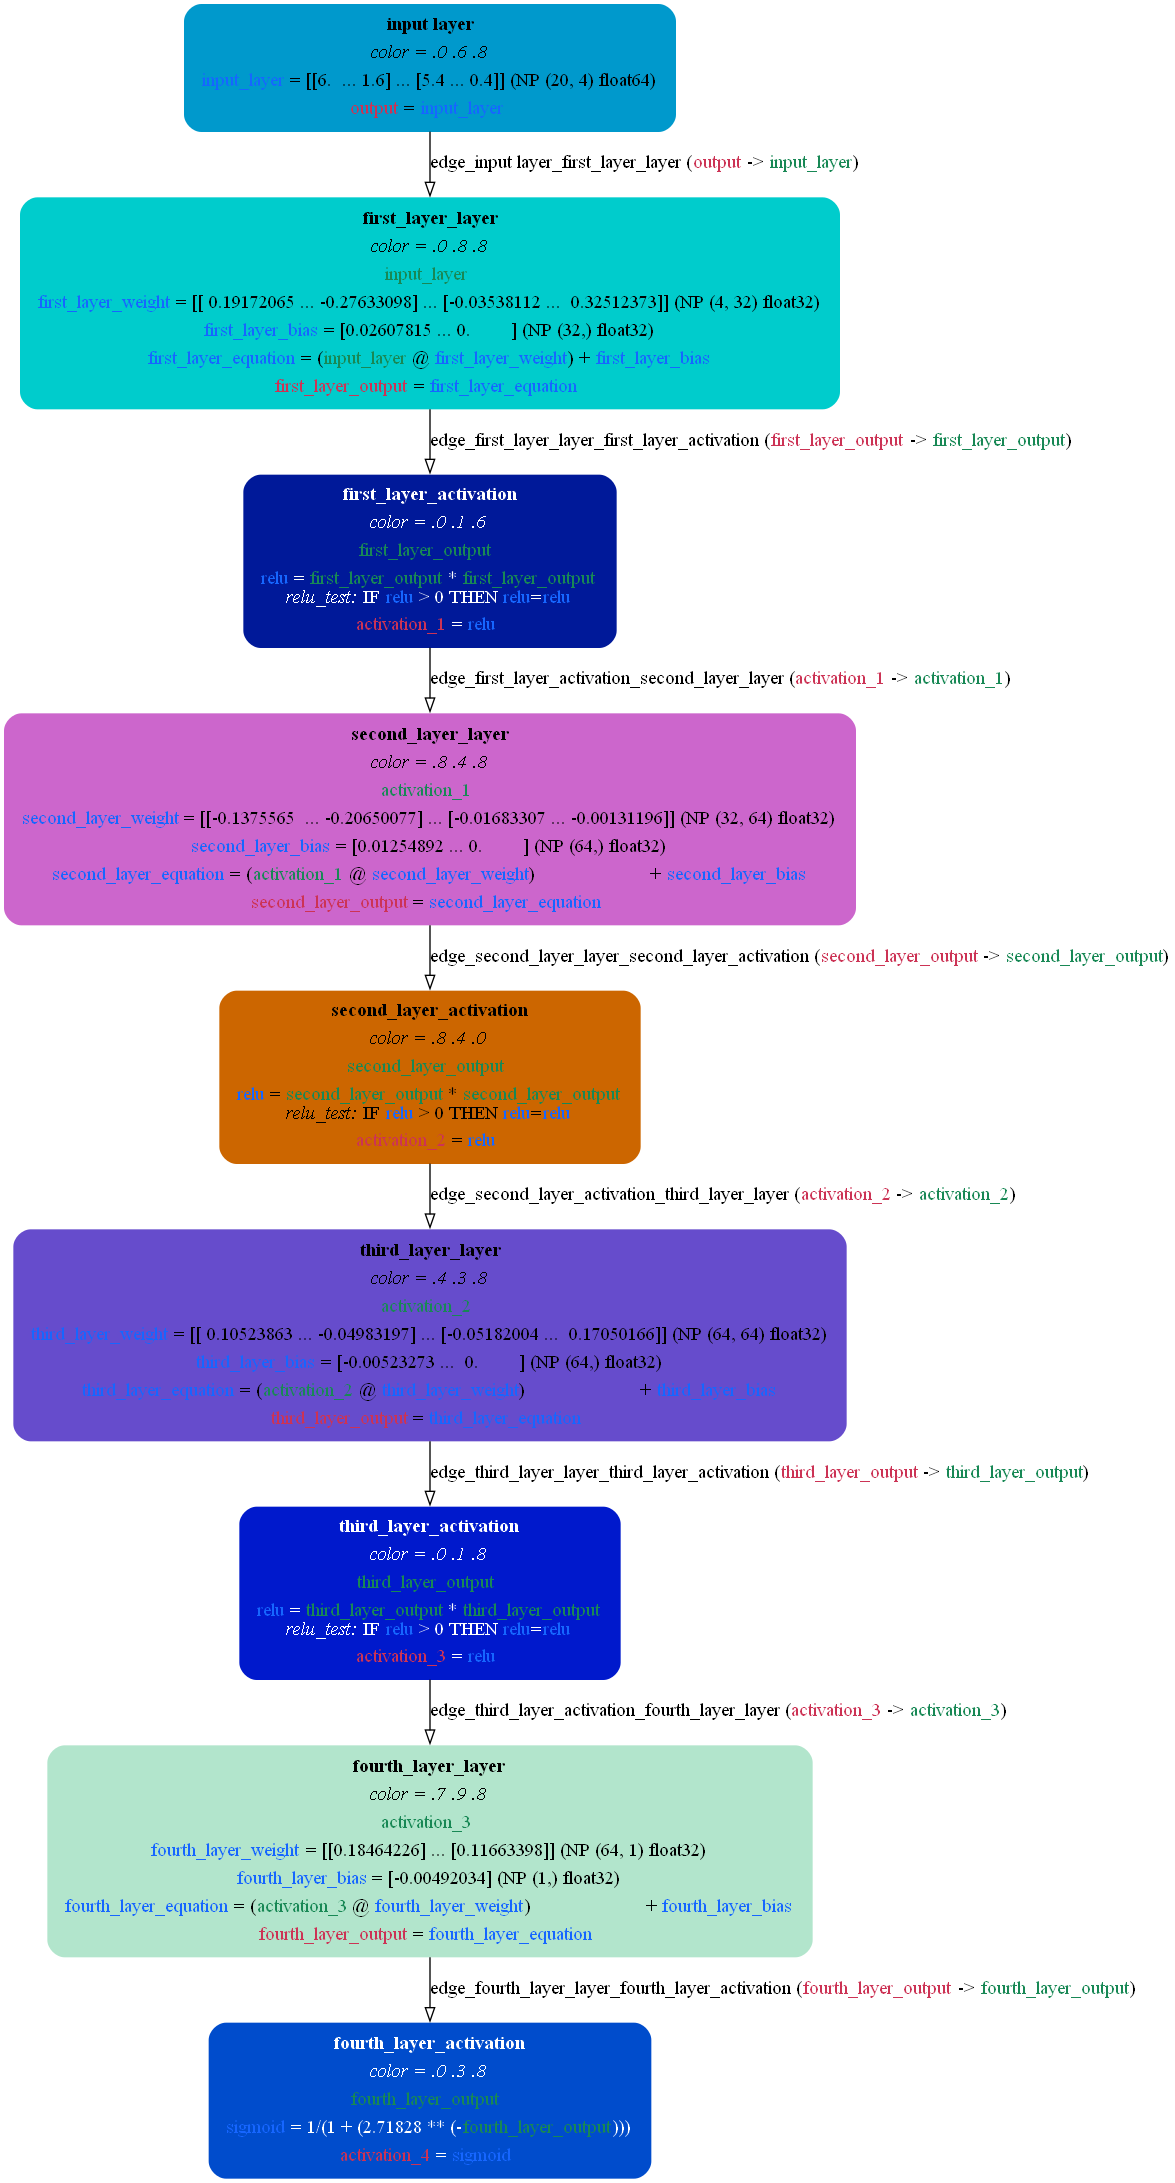

In [19]:
model_mdf.to_graph_image(
        engine="dot",
        output_format="png",
        view_on_render=False,
        level=4,
        filename_root="keras_to_mdf",
        is_horizontal=False,
        solid_color= True
    )

from IPython.display import Image
Image(filename="keras_to_mdf.png")

# Thank you